## Part of Speech Tagging

In [1]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kamal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from nltk import word_tokenize, pos_tag

In [3]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kamal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Kamal\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [4]:
print(pos_tag(word_tokenize("India Japan China is a great country")))

[('India', 'NNP'), ('Japan', 'NNP'), ('China', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('great', 'JJ'), ('country', 'NN')]


In [5]:
# To view all possible POS tags for NLTK lib
import nltk
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [6]:
# Application of {POS taggin}
comments = [  " I am using Mi note5 it is working great",
              " My Samsung s7 is hanging very often", 
              " My friend is using Motorola g5 for last 5 years and happy"
]

In [7]:
for i in range(0, 3):
    print(pos_tag(word_tokenize(comments[i])))
    print("\n")  

[('I', 'PRP'), ('am', 'VBP'), ('using', 'VBG'), ('Mi', 'NNP'), ('note5', 'NN'), ('it', 'PRP'), ('is', 'VBZ'), ('working', 'VBG'), ('great', 'JJ')]


[('My', 'PRP$'), ('Samsung', 'NNP'), ('s7', 'NN'), ('is', 'VBZ'), ('hanging', 'VBG'), ('very', 'RB'), ('often', 'RB')]


[('My', 'PRP$'), ('friend', 'NN'), ('is', 'VBZ'), ('using', 'VBG'), ('Motorola', 'NNP'), ('g5', 'NN'), ('for', 'IN'), ('last', 'JJ'), ('5', 'CD'), ('years', 'NNS'), ('and', 'CC'), ('happy', 'JJ')]




In [8]:
# Select all the words where tag is NNP 
for i in range(0, 3):
    token_comment = word_tokenize(comments[i])
    tagged_comment = pos_tag(token_comment)
    print ( [ (word, tag)  for word, tag in tagged_comment if ( tag == 'NNP')])

[('Mi', 'NNP')]
[('Samsung', 'NNP')]
[('Motorola', 'NNP')]


In [9]:
# NER ( Names Entity Recog)

# Tag Persons 
# Tag Historical Places 
# Tag Organization name 
# Tag Dates 

# You need to have context based information 

# Walking at the bank of river 
# Robbery in the bank 



We are intresetd in building a sentiment classifier with the help of TF-IDF 

In [10]:
import numpy as np
import pandas as pd 
import re
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kamal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Load the dataset 
Airline_Tweets = pd.read_csv("D:\\G\\Python\\NLP\\Airline_Tweets.csv")

In [12]:
# Lets check first few tweets 
Airline_Tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [13]:
Airline_Tweets.shape

(14640, 15)

In [14]:
%matplotlib inline

In [15]:
import seaborn as sns

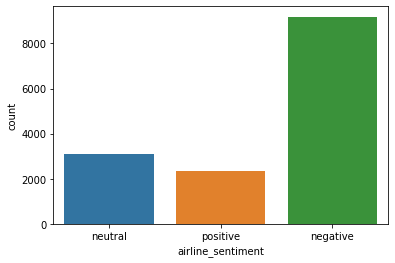

In [16]:
# Create a bar plot for each unique value of col - airline_sentiment
sns.countplot( x='airline_sentiment', data = Airline_Tweets )

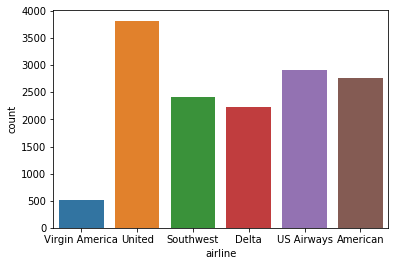

In [17]:
# Create a bar plot for each unique value of col that contains airline name 
sns.countplot( x='airline', data = Airline_Tweets )

For each airline count of comments for each category 

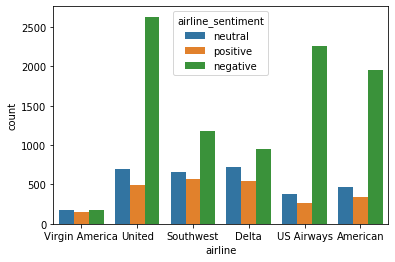

In [18]:
sns.countplot( x='airline',  hue = 'airline_sentiment', data = Airline_Tweets )

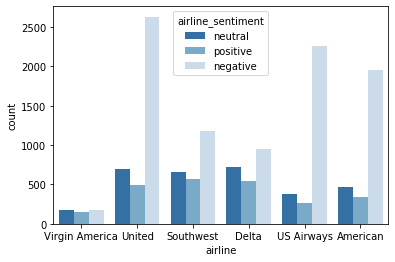

In [19]:
#sns.countplot( x='airline',  hue = 'airline_sentiment', data = Airline_Tweets , color= 'red')
#sns.countplot( x='airline',  hue = 'airline_sentiment', data = Airline_Tweets , palette= 'Reds_d')
sns.countplot( x='airline',   hue = 'airline_sentiment', data = Airline_Tweets , palette= 'Blues_r')

#WordCloud - I want to select all the tweet of negative sentiment and want to know which is the most common word 

In [20]:
neg_phrases = Airline_Tweets[ Airline_Tweets.airline_sentiment == 'negative']

In [21]:
neg_phrases.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
15,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,NaN,smartwatermelon,NaN,0,@VirginAmerica SFO-PDX schedule is still MIA.,NaN,2015-02-24 10:01:50 -0800,"palo alto, ca",Pacific Time (US & Canada)
17,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,NaN,heatherovieda,NaN,0,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)


In [22]:
neg_words = []
for t in neg_phrases.text:  # Go to the "text" column of "neg_phrases" dataframe
    neg_words.append(t)
neg_words[:4]

['@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
 "@VirginAmerica and it's a really big bad thing about it",
 "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA",
 '@VirginAmerica SFO-PDX schedule is still MIA.']

In [23]:
neg_text = pd.Series(neg_words).str.cat(sep = ' ')

In [24]:
neg_text[:50]

"@VirginAmerica it's really aggressive to blast obn"

In [25]:
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud

In [26]:
wordcloud = WordCloud(width = 1600, height = 800, max_font_size = 200).generate(neg_text)

(-0.5, 1599.5, 799.5, -0.5)

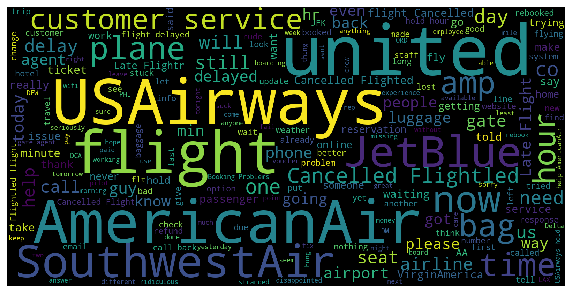

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

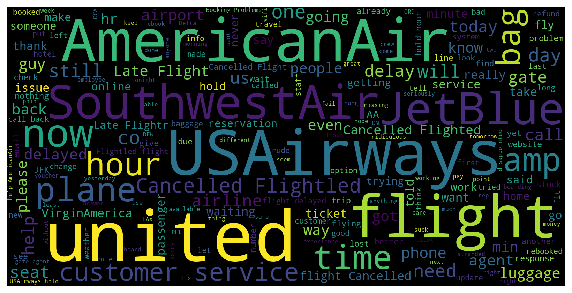

In [28]:
# Stopword - Most commonly used word are stopword 
from wordcloud import STOPWORDS
stop_words = list(STOPWORDS)

wordcloud = WordCloud( stopwords = stop_words, width = 1600, height = 800, max_font_size = 200).generate(neg_text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

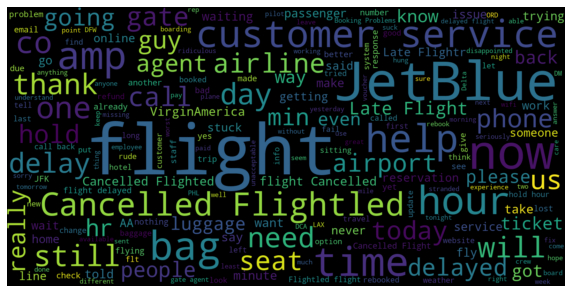

In [29]:
# Stopword - Most commonly used word are stopword 
# I want to update list ot stopwords
from wordcloud import STOPWORDS, ImageColorGenerator
stop_words = [ "USAirways", "plane", "united", "SouthwestAir", "AmericanAir"] + list(STOPWORDS)

wordcloud = WordCloud( stopwords = stop_words, width = 1600, height = 800, max_font_size = 200).generate(neg_text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

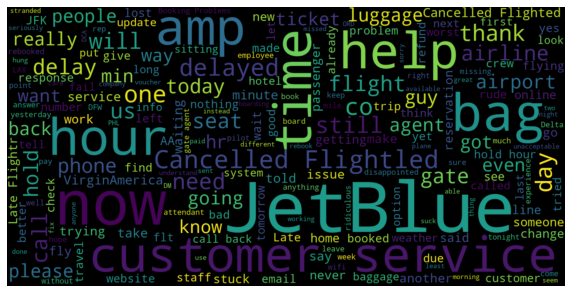

In [30]:
# Stopword - Most commonly used word are stopword 
# I want to update list ot stopwords
from wordcloud import STOPWORDS, ImageColorGenerator
stop_words = [ "USAirways", "plane", "united", "SouthwestAir", "AmericanAir", "flight"] + list(STOPWORDS)

wordcloud = WordCloud( stopwords = stop_words, width = 1600, height = 800, max_font_size = 200).generate(neg_text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

Let's divide date into features and label set

In [31]:
Airline_Tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [32]:
X = Airline_Tweets.iloc[ :, 10].values
y = Airline_Tweets.iloc[ :,  1].values

In [33]:
print(X.shape)
print(y.shape)

(14640,)
(14640,)


In [34]:
X

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

In [35]:
# @A@!!! great show 
#  A    grreat show 


In [36]:
# Cleaning of the text with the help of Regular Expression 
processed_tweets = [ ] # Defining an empty list 

# I want to run a loop from begining to the number of rows in entire dataframe
for tweet in range ( 0, len(X)):  # "tweet here is a couter, instead of "tweet" i or t
    # Remove all the special characters 
    processed_tweets = re.sub(r'\W', ' ', (X[tweet]))
    
    # Remove all single characters 
    processed_tweets = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweets)
    
    #Replace multiple spaces with single space 
    processed_tweets = re.sub(r'\s+', ' ', processed_tweets)
    
    #Convert everything into lower cases 
    processed_tweets = processed_tweets.lower()
    
    processed_tweets+=processed_tweets
#   processed_tweets.append(processed_tweet)  then we get error as    processed_tweets is string here,,, need to check

In [37]:
print(type(processed_tweets))
print((processed_tweets))


<class 'str'>
 americanair we have 8 ppl so we need 2 know how many seats are on the next flight plz put us on standby for 4 people on the next flight  americanair we have 8 ppl so we need 2 know how many seats are on the next flight plz put us on standby for 4 people on the next flight 


In [38]:
processed_tweets = []
 
for tweet in range(0, len(X)):  
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))
 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    processed_tweets.append(processed_tweet)

from the processed tweets lets create a tf-idf matrix 


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
tfidfconvertor = TfidfVectorizer(max_features=5000, min_df = 5, max_df = .7, ngram_range=(1,2), stop_words= stopwords.words('english'))
## tfidfconvertor.transform( "new data")
# min_df = word should be present in atleast 5 documents 
# max_df = word must not occur in more than 70 percent of document ?

In [41]:
X = tfidfconvertor.fit_transform(processed_tweets).toarray()

In [42]:
# Question - Benefit of Tf-Idf over simple CV/tokens/BoW ?

In [43]:
# In X now we have tf-idf values for the text corpus 
# X is ready to be used in ML module 
# and we also have "y" which is our label 

In [44]:
# Split data into training and testing set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)

In [45]:
print(X_train.shape)
print(X_test.shape)

(11712, 5000)
(2928, 5000)


you can pick classifier of your own choice - Random Forest 

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
text_classifier = RandomForestClassifier( n_estimators=100, random_state = 0)

In [48]:
# Let's fit the model 
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [49]:
# Let's do prediction on the test dataset 
predictions = text_classifier.predict(X_test)

In [50]:
predictions  # Predictions on the testing dataset 

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [51]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [52]:
print(classification_report(y_test, predictions ))

              precision    recall  f1-score   support

    negative       0.78      0.93      0.85      1870
     neutral       0.61      0.40      0.49       614
    positive       0.75      0.52      0.61       444

    accuracy                           0.75      2928
   macro avg       0.71      0.62      0.65      2928
weighted avg       0.74      0.75      0.74      2928



In [53]:
accuracy_score(y_test, predictions )

0.7540983606557377

In [54]:
confusion_matrix(y_test,predictions )
# Negative 
# Neutral 
# Positive 

array([[1730,  100,   40],
       [ 330,  247,   37],
       [ 156,   57,  231]], dtype=int64)

In [55]:
# Let's test our model on some new tweets/comments 
X_test1 = tfidfconvertor.transform( [ 'Bad Service from Delta', 'Great Customer support of USAirways', 'Flight on time'])

In [56]:
predictions = text_classifier.predict(X_test1)

In [57]:
predictions

array(['negative', 'positive', 'negative'], dtype=object)

In [58]:
#ASSIGNMENT CODE STARTS FROM HERE

In [59]:
Amazon_Reviews = pd.read_csv("D:\\G\\Python\\NLP\\Consumer_Reviews_of_Amazon_Products_May19.csv") # change path

In [60]:
Amazon_Reviews.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_numHelpful,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [61]:
Amazon_Reviews.shape

(28332, 24)

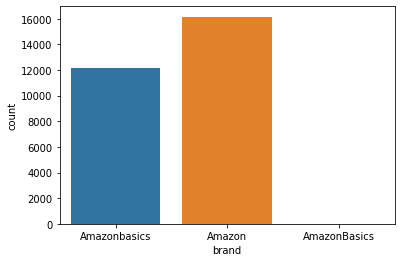

In [62]:
sns.countplot( x='brand', data =Amazon_Reviews )

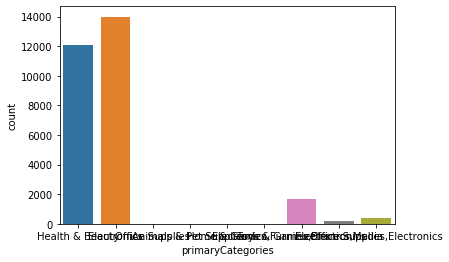

In [63]:
sns.countplot( x='primaryCategories', data = Amazon_Reviews )

In [64]:
wordcloud = WordCloud(width = 1600, height = 800, max_font_size = 200).generate("reviews_text")

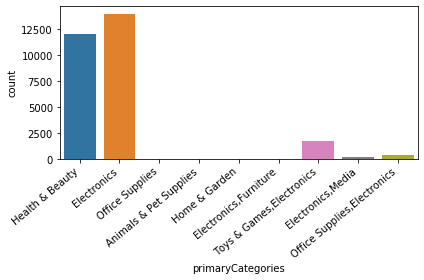

In [65]:
ax = sns.countplot( x='primaryCategories', data = Amazon_Reviews )

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

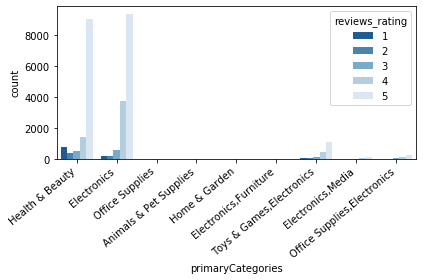

In [66]:
ax2 =sns.countplot( x='primaryCategories',   hue = 'reviews_rating', data = Amazon_Reviews , palette= 'Blues_r')
ax2.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [67]:
neg_phrases2 = Amazon_Reviews[ Amazon_Reviews.reviews_rating == 1]

In [68]:
neg_phrases2.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_numHelpful,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_username,sourceURLs
16,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,1,https://www.amazon.com/product-reviews/B00QWO9...,I don't know if I would buy thus brand again s...,... know if I would buy thus brand again seems...,ByLaura,"https://www.barcodable.com/upc/841710106442,ht..."
24,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,1,https://www.amazon.com/product-reviews/B00QWO9...,These do not last long at all very cheap batte...,... not last long at all very cheap batteries ...,ByDiane ault,"https://www.barcodable.com/upc/841710106442,ht..."
39,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,1,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are horrible. We depend on AA ...,1/4 Capacity Batteries,ByKeith,"https://www.barcodable.com/upc/841710106442,ht..."
43,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,1,https://www.amazon.com/product-reviews/B00QWO9...,First time I bought these they worked well and...,"1st purchase was good, this time they are junk!",ByAlaska Moutian Man,"https://www.barcodable.com/upc/841710106442,ht..."
45,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,1,https://www.amazon.com/product-reviews/B00QWO9...,These batteries don't last even in a simple di...,2 weeks at best.,ByMark A. Hougham,"https://www.barcodable.com/upc/841710106442,ht..."


In [69]:
neg_words2 = []
for t in neg_phrases2.reviews_text:  # Go to the "reviews_text" column of "neg_phrases2" dataframe
    neg_words2.append(t)
neg_words2[:4]

["I don't know if I would buy thus brand again seems like they don't last as long as Duracell",
 'These do not last long at all very cheap batteries no happy',
 "These batteries are horrible. We depend on AA batteries for many wireless microphone and have found that brand-name batteries last about a month per our usage. We switched to Amazon basics to try it out when a subscription for our preferred brand was no longer available and have found that, under the same usage, these batteries last about a week. That's a 1/4 capacity.",
 'First time I bought these they worked well and lasted almost as long as the name brands. Not the same this time around, almost no charge - 4-6 hours of run time - Junk batteries.']

In [70]:
neg_phrases2.reviews_text

16       I don't know if I would buy thus brand again s...
24       These do not last long at all very cheap batte...
39       These batteries are horrible. We depend on AA ...
43       First time I bought these they worked well and...
45       These batteries don't last even in a simple di...
                               ...                        
28197    This Kindle is so overloaded with apps that I ...
28199    I bought the kindle fire 8 for my husband and ...
28254    Freeze frequently... No way to trouble shoot o...
28265    was cheap, can not run chrome stuff, returned ...
28285    Worked great but after awhile I wouldn't unloc...
Name: reviews_text, Length: 965, dtype: object

In [71]:
neg_text2 = pd.Series(neg_words2).str.cat(sep = ' ')

In [72]:
negtext=neg_text2[:50]
negtext


"I don't know if I would buy thus brand again seems"

In [73]:
print(pos_tag(word_tokenize(negtext)))

[('I', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('know', 'VB'), ('if', 'IN'), ('I', 'PRP'), ('would', 'MD'), ('buy', 'VB'), ('thus', 'RB'), ('brand', 'NN'), ('again', 'RB'), ('seems', 'VBZ')]


In [74]:
wordcloud2 = WordCloud(width = 1600, height = 800, max_font_size = 200).generate(neg_text2)

(-0.5, 1599.5, 799.5, -0.5)

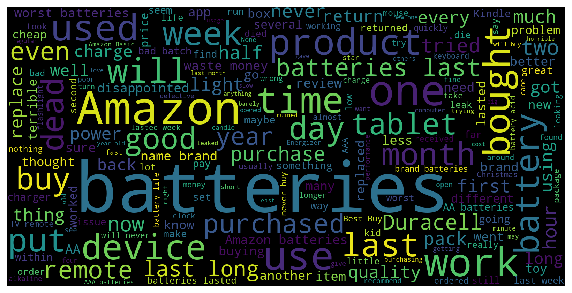

In [75]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud2)
plt.axis("off")

In [76]:
pos_phrases2 = Amazon_Reviews[ Amazon_Reviews.reviews_rating == 5]
pos_phrases2.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_numHelpful,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_username,sourceURLs
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."
5,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Bought a lot of batteries for Christmas and th...,... batteries for Christmas and the AmazonBasi...,ByPainter Marlow,"https://www.barcodable.com/upc/841710106442,ht..."
6,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,ive not had any problame with these batteries ...,... batteries have ordered them in the past be...,ByAmazon Customer,"https://www.barcodable.com/upc/841710106442,ht..."


In [77]:
pos_words2 = []
for t in pos_phrases2.reviews_text:  # Go to the "text" column of "neg_phrases" dataframe
    pos_words2.append(t)
pos_words2[:4]

['Well they are not Duracell but for the price i am happy.',
 'Seem to work as well as name brand batteries at a much better price',
 'These batteries are very long lasting the price is great.',
 "Bought a lot of batteries for Christmas and the AmazonBasics Cell have been good. I haven't noticed a difference between the brand name batteries and the Amazon Basic brand. Just a lot easier to purchase and have arrive at the house and have on hand. Will buy again."]

In [78]:
pos_text2 = pd.Series(pos_words2).str.cat(sep = ' ')
pos_text2[:50]

'Well they are not Duracell but for the price i am '

(-0.5, 1599.5, 799.5, -0.5)

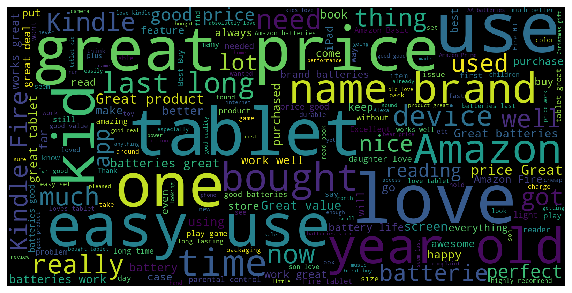

In [79]:
wordcloud3 = WordCloud(width = 1600, height = 800, max_font_size = 200).generate(pos_text2)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud3)
plt.axis("off")

In [80]:
neu_phrases2 = Amazon_Reviews[ Amazon_Reviews.reviews_rating == 3]
neu_phrases2.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_numHelpful,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
8,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,These do not hold the amount of high power jui...,... do not hold the amount of high power juice...,ByK.R.,"https://www.barcodable.com/upc/841710106442,ht..."
11,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,When I first started getting the Amazon basic ...,... first started getting the Amazon basic bat...,Byd'Isigny,"https://www.barcodable.com/upc/841710106442,ht..."
19,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,Bought these batteries for my Christmas gifts ...,... my Christmas gifts the month of (december)...,ByAmazon Customer,"https://www.barcodable.com/upc/841710106442,ht..."
29,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,these were under a light we thought they were ...,... there to fit the light when they arrived a...,Bymerle,"https://www.barcodable.com/upc/841710106442,ht..."


In [81]:
neu_words2 = []
for t in neu_phrases2.reviews_text:  # Go to the "text" column of "neg_phrases" dataframe
    neu_words2.append(t)
neu_words2[:4]

['I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.',
 'These do not hold the amount of high power juice like energizer or duracell, but they are half the price.',
 'When I first started getting the Amazon basic batteries I really liked them. With recent purchases, they do not seem to last like they had, or maybe a mixed-bag (inconsistent with some lasting better than others). I have not done any tests, but feel some other brands may last longer. However, the price is hard to beat.',
 "Bought these batteries for my Christmas gifts the month of (december) only lasted like 2months toys now need replacement batteries . I also used some for my doorbell and just now needs replacement batteries. Tv Remote control is still working but these batteries don't last very long..."]

In [82]:
neu_text2 = pd.Series(neu_words2).str.cat(sep = ' ')
neu_text2[:50]

'I order 3 of them and one of the item is bad quali'

(-0.5, 1599.5, 799.5, -0.5)

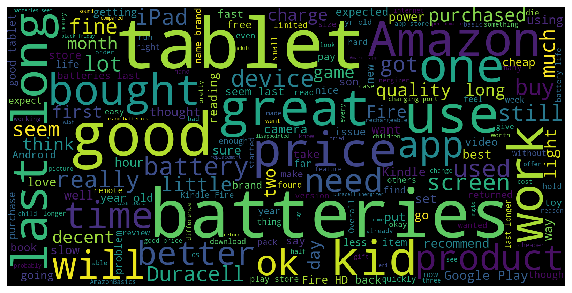

In [83]:
wordcloud4 = WordCloud(width = 1600, height = 800, max_font_size = 200).generate(neu_text2)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud4)
plt.axis("off")

In [84]:
neg_phrases2Health = neg_phrases2[ neg_phrases2.primaryCategories == "Health & Beauty"]
neg_phrases2Health.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_numHelpful,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_username,sourceURLs
16,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,1,https://www.amazon.com/product-reviews/B00QWO9...,I don't know if I would buy thus brand again s...,... know if I would buy thus brand again seems...,ByLaura,"https://www.barcodable.com/upc/841710106442,ht..."
24,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,1,https://www.amazon.com/product-reviews/B00QWO9...,These do not last long at all very cheap batte...,... not last long at all very cheap batteries ...,ByDiane ault,"https://www.barcodable.com/upc/841710106442,ht..."
39,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,1,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are horrible. We depend on AA ...,1/4 Capacity Batteries,ByKeith,"https://www.barcodable.com/upc/841710106442,ht..."
43,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,1,https://www.amazon.com/product-reviews/B00QWO9...,First time I bought these they worked well and...,"1st purchase was good, this time they are junk!",ByAlaska Moutian Man,"https://www.barcodable.com/upc/841710106442,ht..."
45,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,1,https://www.amazon.com/product-reviews/B00QWO9...,These batteries don't last even in a simple di...,2 weeks at best.,ByMark A. Hougham,"https://www.barcodable.com/upc/841710106442,ht..."


In [85]:
neg_words2Health = []
for t in neg_phrases2Health.reviews_text:  # Go to the "text" column of "neg_phrases" dataframe
    neg_words2Health.append(t)
neg_words2Health[:4]

["I don't know if I would buy thus brand again seems like they don't last as long as Duracell",
 'These do not last long at all very cheap batteries no happy',
 "These batteries are horrible. We depend on AA batteries for many wireless microphone and have found that brand-name batteries last about a month per our usage. We switched to Amazon basics to try it out when a subscription for our preferred brand was no longer available and have found that, under the same usage, these batteries last about a week. That's a 1/4 capacity.",
 'First time I bought these they worked well and lasted almost as long as the name brands. Not the same this time around, almost no charge - 4-6 hours of run time - Junk batteries.']

In [86]:
neg_text2Health = pd.Series(neg_words2Health).str.cat(sep = ' ')
neg_text2Health[:50]

"I don't know if I would buy thus brand again seems"

(-0.5, 1599.5, 799.5, -0.5)

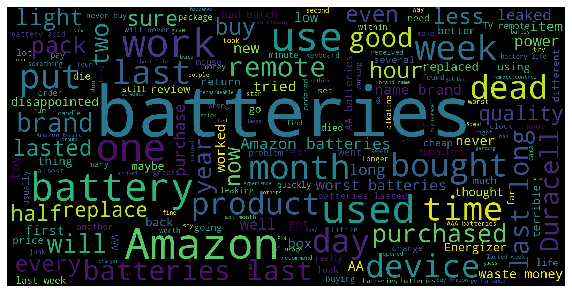

In [87]:
wordcloud5 = WordCloud(width = 1600, height = 800, max_font_size = 200).generate(neg_text2Health)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud5)
plt.axis("off")

In [88]:
pos_phrases2Elec = pos_phrases2[ pos_phrases2.primaryCategories == "Electronics"]
pos_phrases2Elec.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_numHelpful,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_username,sourceURLs
8343,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,Great case to keep everything in its place! My...,Excellent product,qs341_5,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...
8344,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,NaN,5,http://www.amazon.co.uk/gp/product-reviews/B00...,After discarding and getting rid of broken cd ...,It was a much needed storage,Diablita,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...
8345,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,"A few dollars more, but I am boycotting amazon",it was worth it,coldbloodblazing,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...
8347,AVpfl8cLLJeJML43AE3S,2016-04-08T18:16:28Z,2019-04-25T08:51:22Z,Amazon Echo ‚Äì White,"B01E6AO69U,B00L9EPT8O",Amazon,"Stereos,Remote Controls,Audio Docks & Mini Spe...",Electronics,https://i.ebayimg.com/images/g/NWEAAOSwDehbdx6...,"amazonechowhite/b00l9ept8o,amazonechowhite/b01...",...,True,NaN,NaN,NaN,5,https://www.newegg.com/Product/Product.aspx?It...,Pros: Standard Echo. Cons: Older generation Ec...,Arrived as described.,Anonymous,https://www.newegg.com/Product/Product.aspx?It...
8348,AVpfl8cLLJeJML43AE3S,2016-04-08T18:16:28Z,2019-04-25T08:51:22Z,Amazon Echo ‚Äì White,"B01E6AO69U,B00L9EPT8O",Amazon,"Stereos,Remote Controls,Audio Docks & Mini Spe...",Electronics,https://i.ebayimg.com/images/g/NWEAAOSwDehbdx6...,"amazonechowhite/b00l9ept8o,amazonechowhite/b01...",...,True,NaN,NaN,NaN,5,https://www.newegg.com/Product/Product.aspx?It...,"Pros: Got it for under 50, much impressive sou...",Much better sound sound than 2nd generation,Anonymous,https://www.newegg.com/Product/Product.aspx?It...


In [89]:
pos_words2Elec = []
for t in pos_phrases2Elec.reviews_text:  # Go to the "text" column of "neg_phrases" dataframe
    pos_words2Elec.append(t)
pos_words2Elec[:4]

['Great case to keep everything in its place! My husband love it!!!! Holds a lot of cds!',
 'After discarding and getting rid of broken cd cases, broken cds, and selecting those ones we really like, this binder turned up to be an excellent option to store our favourite cds and dvds and keep them in a small space at our living room, giving us the choice to donate or get rid of those cds towers that took a lot of room, despite looking nice. And because you can turn the pages, you can spot the cd you want to play without the hassle of taking it from a case that is falling apart. After storing them cds, all the cases and printed covers went straight to the recycling centre. We have a small version to put those cds my husband would like to listen to whenever he must drive away for work.',
 'A few dollars more, but I am boycotting amazon',
 'Pros: Standard Echo. Cons: Older generation Echo. Other Thoughts: Arrived on time and was new in box.']

In [90]:
pos_text2Elec = pd.Series(pos_words2Elec).str.cat(sep = ' ')
pos_text2Elec[:50]

'Great case to keep everything in its place! My hus'

(-0.5, 1599.5, 799.5, -0.5)

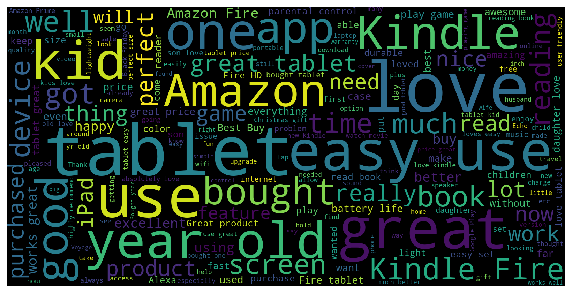

In [91]:
wordcloud6 = WordCloud(width = 1600, height = 800, max_font_size = 200).generate(pos_text2Elec)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud6)
plt.axis("off")

In [92]:
pos_words2Elec2 = []
for t in pos_phrases2Elec.reviews_title:  # Go to the "TITLE (not text) dataframe
    pos_words2Elec2.append(t)
pos_words2Elec2[:4]

['Excellent product',
 'It was a much needed storage',
 'it was worth it',
 'Arrived as described.']

In [93]:
pos_text2Elec2 = pd.Series(pos_words2Elec2).str.cat(sep = ' ')
posElec=pos_text2Elec2[:50]
posElec

'Excellent product It was a much needed storage it '

In [94]:
print(pos_tag(word_tokenize(posElec)))

[('Excellent', 'JJ'), ('product', 'NN'), ('It', 'PRP'), ('was', 'VBD'), ('a', 'DT'), ('much', 'RB'), ('needed', 'VBN'), ('storage', 'NN'), ('it', 'PRP')]


(-0.5, 1599.5, 799.5, -0.5)

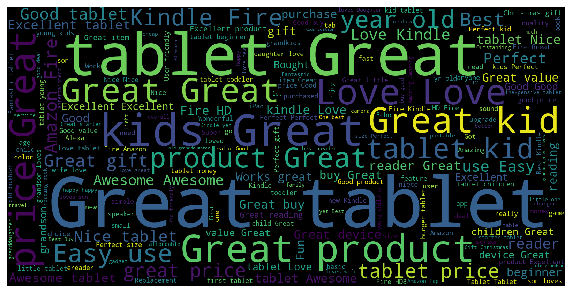

In [95]:
wordcloud7 = WordCloud(width = 1600, height = 800, max_font_size = 200).generate(pos_text2Elec2)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud7)
plt.axis("off")

In [96]:
X = Amazon_Reviews.iloc[ :, 20].values
y = Amazon_Reviews.iloc[ :,  18].values

In [97]:
print(X.shape)
print(y.shape)

(28332,)
(28332,)


In [98]:
X

array(['I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.',
       'Bulk is always the less expensive way to go for products like these',
       'Well they are not Duracell but for the price i am happy.', ...,
       'Very nice for light internet browsing, keeping on top of email, viewing videos, and reading e books, which I like to get free from the library. Good browser, good battery power, fast charge. Very relaxing to sit in a comfy chair and read or browse. Has given me hours of enjoyment and information for a minimal price.',
       'This Tablet does absolutely everything I want! I can watch TV Shows or Movies, check my Mail, Facebook, Google.......pay all my bills. It processes fast and has a beautiful screen. As I said: Everything I want in a Tablet for less than $100!',
       "At ninety dollars, the expectionations are low, but this is still a very good table, it's good for light use lik

In [99]:
y

array([3, 4, 5, ..., 5, 5, 4], dtype=int64)

In [100]:
processed_tweets = []
 
for tweet in range(0, len(X)):  
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))
 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    processed_tweets.append(processed_tweet)

In [101]:
print(type(processed_tweets))
print((processed_tweets[:4]))


<class 'list'>
['i order 3 of them and one of the item is bad quality is missing backup spring so have to put pcs of aluminum to make the battery work ', 'bulk is always the less expensive way to go for products like these', 'well they are not duracell but for the price am happy ', 'seem to work as well as name brand batteries at much better price']


In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [103]:
tfidfconvertor = TfidfVectorizer(max_features=5000, min_df = 5, max_df = .7, ngram_range=(1,2), stop_words= stopwords.words('english'))
## tfidfconvertor.transform( "new data")
# min_df = word should be present in atleast 5 documents 
# max_df = word must not occur in more than 70 percent of document ?

In [104]:
X = tfidfconvertor.fit_transform(processed_tweets).toarray()

In [105]:
# Split data into training and testing set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)

In [106]:
print(X_train.shape)
print(X_test.shape)

(22665, 5000)
(5667, 5000)


In [107]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier( n_estimators=100, random_state = 0)

In [108]:
# Let's fit the model 
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [109]:
# Let's do prediction on the test dataset 
predictions = text_classifier.predict(X_test)
predictions  # Predictions on the testing dataset 

array([1, 5, 1, ..., 5, 5, 5], dtype=int64)

In [110]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(classification_report(y_test, predictions ))

              precision    recall  f1-score   support

           1       0.84      0.62      0.71       197
           2       0.82      0.36      0.50       126
           3       0.96      0.55      0.69       244
           4       0.91      0.61      0.73      1128
           5       0.86      0.99      0.92      3972

    accuracy                           0.87      5667
   macro avg       0.88      0.62      0.71      5667
weighted avg       0.87      0.87      0.85      5667



In [111]:
accuracy_score(y_test, predictions )

0.8664196223751544

In [112]:
confusion_matrix(y_test,predictions )

array([[ 122,    6,    2,    2,   65],
       [  12,   45,    0,   11,   58],
       [   4,    4,  133,   13,   90],
       [   1,    0,    2,  688,  437],
       [   6,    0,    2,   42, 3922]], dtype=int64)

In [113]:
# Let's test our model on some new tweets/comments 
X_test1 = tfidfconvertor.transform( [ 'Batteries work well', 'Kindle is great', 'Easy to use and cheap', 'bad and poor quality device'])

In [114]:
predictions = text_classifier.predict(X_test1)
predictions 

array([5, 5, 5, 1], dtype=int64)